In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [3]:
# eng_alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
eng_alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

In [4]:
train = pd.read_csv(r'.\train.csv')
test = pd.read_csv(r'.\test.csv')

A


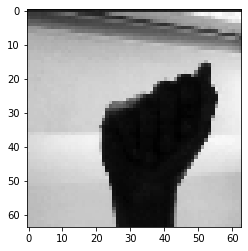

In [38]:
# train = pd.read_csv(r'.\letters\sign_mnist_train.csv')
# test = pd.read_csv(r'.\letters\sign_mnist_test.csv')


x_train = train.loc[:, train.columns != 'label'].values
y_train = train['label'].values

x_test = test.loc[:, train.columns != 'label'].values
y_test = test['label'].values

x_train = x_train / 255
x_test = x_test / 255

# savedIMG = cv2.resize(x_train[100], (28, 28))
print(eng_alphabet[y_train[101]])
img_arr = pd.DataFrame(x_train[101].reshape(-1, 64)).set_index(0)
plt.imshow(img_arr, cmap='gray')
# print(x_train[100])

B


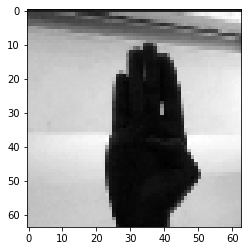

In [42]:
print(eng_alphabet[y_train[3000]])
img_arr = pd.DataFrame(x_train[3000].reshape(-1, 64)).set_index(0)
plt.imshow(img_arr, cmap='gray')

In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(4096, )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(29)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
2719/2719 [==============================] - 8s 2ms/step - loss: 3.3691 - accuracy: 0.0333
Epoch 2/10
2719/2719 [==============================] - 7s 3ms/step - loss: 3.3676 - accuracy: 0.0335
Epoch 3/10
2719/2719 [==============================] - 6s 2ms/step - loss: 3.3676 - accuracy: 0.0331
Epoch 4/10
2719/2719 [==============================] - 7s 3ms/step - loss: 3.3676 - accuracy: 0.0334
Epoch 5/10
2719/2719 [==============================] - 6s 2ms/step - loss: 3.3677 - accuracy: 0.0335
Epoch 6/10
2719/2719 [==============================] - 6s 2ms/step - loss: 3.3676 - accuracy: 0.0341
Epoch 7/10
2719/2719 [==============================] - 6s 2ms/step - loss: 3.3676 - accuracy: 0.0332
Epoch 8/10
2719/2719 [==============================] - 6s 2ms/step - loss: 3.3677 - accuracy: 0.0321
Epoch 9/10
2719/2719 [==============================] - 8s 3ms/step - loss: 3.3677 - accuracy: 0.0335
Epoch 10/10
2719/2719 [==============================] - 7s 2ms/step - loss: 3.367

In [70]:
youimg = cv2.imread('gray.png')
youimg = cv2.flip(youimg, 1)
youimg = cv2.resize(youimg, (64, 64))
youimg = cv2.cvtColor(youimg, cv2.COLOR_BGR2GRAY)
youimg = youimg.reshape(1, -1)

probabily_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) 
predictions = probabily_model.predict(youimg)

Text(0.5, 0, 'Z')

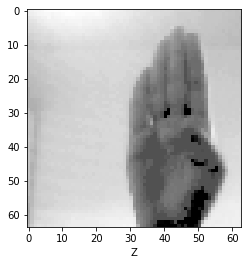

In [72]:
# plt.figure(figsize=(10, 10))
# for i in range(12):
# plt.subplot()
img_arr = pd.DataFrame(youimg.reshape(-1, 64)).set_index(0)
plt.imshow(img_arr, cmap='gray')
index = np.argmax(predictions[0])
plt.xlabel(eng_alphabet[index])
# plt.ylabel(eng_alphabet[y_test[i]])
# plt.xticks([])
# plt.yticks([])

# plt.show()